<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Assignment-2/vitalfew-logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **데이터 구성하기**

In [4]:
df_raw = pd.read_excel('/content/mydrive/MyDrive/1. 실습데이터 설명(Data Dictionary).xlsx',
                       sheet_name = 'SCALE불량')

print(df_raw.shape)
df_raw.head()

(720, 21)


,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707.0,15109.0,14180.0,1호기,...,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,적용,8.0,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707.0,15109.0,14180.0,1호기,...,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,적용,8.0,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619.0,19181.0,18130.0,2호기,...,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,적용,8.0,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619.0,19181.0,18130.0,2호기,...,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,적용,8.0,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098.0,13334.0,12430.0,3호기,...,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,적용,8.0,1조


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    float64
 7   PT_LTH             720 non-null    float64
 8   PT_WGT             720 non-null    float64
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    float64
 11  FUR_HZ_TEMP        720 non-null    float64
 12  FUR_HZ_TIME        720 non-null    float64
 13  FUR_SZ_TEMP        720 non-null    float64
 14  FUR_SZ_TIME        720 non-null    float64
 15  FUR_TIME           720 non-null    float64
 16  FUR_EXTEMP         720 non

**범주형 변수의 범주 확인하기**

In [6]:
df_raw['SPEC'].value_counts()

JS-SM490YB    84
LR-A          54
NV-A          48
PILAC-BT33    40
BV-EH36-TM    35
              ..
KR-B           1
BV-A           1
CCS-B          1
KS-HSB600      1
BV-AH36-TM     1
Name: SPEC, Length: 66, dtype: int64

In [7]:
df_raw['STEEL_KIND'].value_counts()

C0    503
T8     95
T5     43
T7     35
T1     18
T0     16
C3      7
T3      2
C1      1
Name: STEEL_KIND, dtype: int64

In [8]:
df_raw['FUR_NO'].value_counts()

3호기    243
1호기    240
2호기    237
Name: FUR_NO, dtype: int64

In [9]:
df_raw['FUR_NO_ROW'].value_counts()

1.0    362
2.0    358
Name: FUR_NO_ROW, dtype: int64

In [10]:
df_raw['FUR_NO_ROW'] = df_raw['FUR_NO_ROW'].astype('object')

In [11]:
df_raw['HSB'].value_counts()

적용     687
미적용     33
Name: HSB, dtype: int64

In [12]:
df_raw['WORK_GR'].value_counts()

4조    194
1조    189
3조    172
2조    165
Name: WORK_GR, dtype: int64

**결측값 확인하기**

In [13]:
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

**목표변수와 설명변수 분리하기**

In [14]:
df_raw_x = df_raw.drop('SCALE', axis = 1, inplace = False)
df_raw_y = df_raw['SCALE']

In [15]:
df_raw_y[df_raw_y == '불량'] = 1
df_raw_y[df_raw_y == '양품'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df_raw_y.value_counts()

0    489
1    231
Name: SCALE, dtype: int64

**불필요한 설명변수 제외하기 & 더미변수 생성하기**

In [17]:
df_raw_x.columns

Index(['PLATE_NO', 'ROLLING_DATE', 'SPEC', 'STEEL_KIND', 'PT_THK', 'PT_WDTH',
       'PT_LTH', 'PT_WGT', 'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP',
       'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

In [18]:
df_raw_x = df_raw_x.drop(['PLATE_NO', 'ROLLING_DATE', 'SPEC'], axis = 1, inplace = False)

In [19]:
df_raw_x_dummy = pd.get_dummies(df_raw_x)

print(df_raw_x_dummy.shape)
df_raw_x_dummy.head()

(720, 32)


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1.0,FUR_NO_ROW_2.0,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,32.25,3707.0,15109.0,14180.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,...,0,0,1,0,0,1,0,1,0,0
1,32.25,3707.0,15109.0,14180.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,...,0,0,0,1,0,1,0,1,0,0
2,33.27,3619.0,19181.0,18130.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,...,1,0,1,0,0,1,0,0,1,0
3,33.27,3619.0,19181.0,18130.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,...,1,0,0,1,0,1,0,0,1,0
4,38.33,3098.0,13334.0,12430.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,...,0,1,1,0,0,1,1,0,0,0


In [20]:
df_raw_x_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PT_THK             720 non-null    float64
 1   PT_WDTH            720 non-null    float64
 2   PT_LTH             720 non-null    float64
 3   PT_WGT             720 non-null    float64
 4   FUR_HZ_TEMP        720 non-null    float64
 5   FUR_HZ_TIME        720 non-null    float64
 6   FUR_SZ_TEMP        720 non-null    float64
 7   FUR_SZ_TIME        720 non-null    float64
 8   FUR_TIME           720 non-null    float64
 9   FUR_EXTEMP         720 non-null    float64
 10  ROLLING_TEMP_T5    720 non-null    float64
 11  ROLLING_DESCALING  720 non-null    float64
 12  STEEL_KIND_C0      720 non-null    uint8  
 13  STEEL_KIND_C1      720 non-null    uint8  
 14  STEEL_KIND_C3      720 non-null    uint8  
 15  STEEL_KIND_T0      720 non-null    uint8  
 16  STEEL_KIND_T1      720 non

In [21]:
df_raw_x_dummy.describe().round(3)

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1.0,FUR_NO_ROW_2.0,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
count,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000,...,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000
mean,29.268,2807.128,34323.269,41481.778,1155.339,88.528,1149.667,78.803,300.564,1149.667,...,0.329,0.338,0.503,0.497,0.046,0.954,0.262,0.229,0.239,0.269
std,19.153,517.840,13828.435,24751.322,20.866,37.661,17.572,36.421,45.390,17.572,...,0.470,0.473,0.500,0.500,0.209,0.209,0.440,0.421,0.427,0.444
min,12.030,1800.000,7893.000,7820.000,1103.000,43.000,1113.000,35.000,221.000,1113.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,16.090,2466.000,22663.000,17757.500,1139.000,65.000,1132.000,57.750,257.000,1132.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
50%,20.130,2725.000,37380.000,36120.000,1158.000,75.000,1155.000,67.500,304.000,1155.000,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
75%,40.000,3125.000,43735.000,61120.000,1171.000,101.000,1164.000,86.000,342.000,1164.000,...,1.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000
max,100.340,4575.000,54917.000,115080.000,1206.000,312.000,1185.000,294.000,398.000,1185.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [22]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x_dummy,
                                                                df_raw_y,
                                                                test_size = 0.3)

print('Shape of df_train_x : {}'.format(df_train_x.shape))
print('Shape of df_test_x : {}'.format(df_test_x.shape))
print('Shape of df_train_y : {}'.format(df_train_y.shape))
print('Shape of df_test_y : {}'.format(df_test_y.shape))

Shape of df_train_x : (504, 32)
Shape of df_test_x : (216, 32)
Shape of df_train_y : (504,)
Shape of df_test_y : (216,)


In [23]:
print(df_train_x.shape)
df_train_x.head()

(504, 32)


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1.0,FUR_NO_ROW_2.0,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
571,19.63,2451.0,43395.0,49170.0,1174.0,75.0,1163.0,52.0,360.0,1163.0,...,1,0,1,0,0,1,0,1,0,0
593,14.07,2555.0,52835.0,44730.0,1165.0,61.0,1158.0,57.0,342.0,1158.0,...,0,0,1,0,0,1,0,0,0,1
168,20.10,2574.0,45600.0,92600.0,1165.0,78.0,1163.0,71.0,314.0,1163.0,...,0,0,1,0,0,1,0,0,0,1
154,40.16,2464.0,25077.0,77920.0,1174.0,74.0,1167.0,60.0,312.0,1167.0,...,1,0,1,0,0,1,0,0,1,0
0,32.25,3707.0,15109.0,14180.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,...,0,0,1,0,0,1,0,1,0,0


In [24]:
print(df_train_y.shape)
df_train_y.head()

(504,)


571    1
593    0
168    1
154    1
0      0
Name: SCALE, dtype: object

In [25]:
print(df_test_x.shape)
df_test_x.head()

(216, 32)


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1.0,FUR_NO_ROW_2.0,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
247,15.08,2671.0,43613.0,13790.0,1131.0,61.0,1138.0,47.0,258.0,1138.0,...,0,0,0,1,0,1,1,0,0,0
82,75.71,2500.0,9267.0,13770.0,1132.0,77.0,1124.0,101.0,323.0,1124.0,...,0,1,1,0,0,1,0,0,0,1
634,16.09,2381.0,43526.0,13090.0,1167.0,79.0,1162.0,59.0,261.0,1162.0,...,0,1,0,1,0,1,0,0,0,1
90,20.13,3575.0,39279.0,66570.0,1129.0,76.0,1126.0,118.0,336.0,1126.0,...,0,1,1,0,0,1,1,0,0,0
652,12.56,2693.0,53819.0,42870.0,1183.0,78.0,1166.0,58.0,257.0,1166.0,...,0,1,0,1,0,1,0,0,0,1


In [26]:
print(df_test_y.shape)
df_test_y.head()

(216,)


247    0
82     0
634    0
90     0
652    0
Name: SCALE, dtype: object

### **로지스틱 회귀모델 및 회귀계수 검토**

In [27]:
print(df_raw_x.shape)
df_raw_x.head()

(720, 17)


,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,T1,32.25,3707.0,15109.0,14180.0,1호기,1.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,적용,8.0,2조
1,T1,32.25,3707.0,15109.0,14180.0,1호기,2.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,적용,8.0,2조
2,T8,33.27,3619.0,19181.0,18130.0,2호기,1.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,적용,8.0,3조
3,T8,33.27,3619.0,19181.0,18130.0,2호기,2.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,적용,8.0,3조
4,T8,38.33,3098.0,13334.0,12430.0,3호기,1.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,적용,8.0,1조


In [28]:
print(df_raw_y.shape)
df_raw_y.head()

(720,)


0    0
1    0
2    0
3    0
4    0
Name: SCALE, dtype: object

In [55]:
dat = pd.concat([df_, df_raw_x], axis = 1)

print(dat.shape)
dat.head()

(720, 18)


,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,T1,32.25,3707.0,15109.0,14180.0,1호기,1.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,적용,8.0,2조
1,0,T1,32.25,3707.0,15109.0,14180.0,1호기,2.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,적용,8.0,2조
2,0,T8,33.27,3619.0,19181.0,18130.0,2호기,1.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,적용,8.0,3조
3,0,T8,33.27,3619.0,19181.0,18130.0,2호기,2.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,적용,8.0,3조
4,0,T8,38.33,3098.0,13334.0,12430.0,3호기,1.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,적용,8.0,1조


In [58]:
print(dat.shape)
dat.columns

(720, 18)


Index(['SCALE', 'STEEL_KIND', 'PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT',
       'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP',
       'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'HSB',
       'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

In [30]:
log_model = Logit.from_formula("""SCALE ~ C(STEEL_KIND) + PT_THK + PT_WDTH + PT_LTH + PT_WGT +
                                    C(FUR_NO) + C(FUR_NO_ROW) + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP +                                    ROLLING_TEMP_T5 +  ROLLING_DESCALING + C(STEEL_KIND) +
                                    ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING + C(WORK_GR)""", 
                               df_raw)

In [31]:
log_result = log_model.fit(method = 'bfgs')

ValueError: ignored

In [ ]:
print(log_result.summary())

- PT_WIDTH, FUR_HZ_TIME, ROLLING_TEMP_T5, ROLLING_DESCALING이 유의확률 5% 하에서 유의한 회귀계수라고 판단된다.
- 불량여부에 대해 각각 -0.1%, 0.99%, 2.67%, -4.896%의 영향을 미친다.

#### 예측

In [ ]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["SCALE"],y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")

Train 예측 결과 
 217    1
519    0
719    0
353    0
676    1
dtype: int32 

Confusion Matrix: 
[[269  26]
 [ 38  99]] 

Test 예측 결과 
 146    1
131    1
650    0
613    1
355    0
dtype: int32 

Confusion Matrix: 
[[163  31]
 [ 24  70]] 



#### 평가

In [ ]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["SCALE"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["SCALE"],y_pred_train_class)),"\n")
print(classification_report(df_train["SCALE"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")
print(classification_report(df_test["SCALE"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.852

Confusion Matrix: 
[[269  26]
 [ 38  99]] 

              precision    recall  f1-score   support

           0      0.876     0.912     0.894       295
           1      0.792     0.723     0.756       137

    accuracy                          0.852       432
   macro avg      0.834     0.817     0.825       432
weighted avg      0.850     0.852     0.850       432

Test 예측/분류 결과
Accuracy: 0.809

Confusion Matrix: 
[[163  31]
 [ 24  70]] 

              precision    recall  f1-score   support

           0      0.872     0.840     0.856       194
           1      0.693     0.745     0.718        94

    accuracy                          0.809       288
   macro avg      0.782     0.792     0.787       288
weighted avg      0.813     0.809     0.811       288



#### 목표변수 label 지정

In [ ]:
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print("Train 예측/분류 결과")
# print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))
print(classification_report(df_test["SCALE"], y_pred_test_class, target_names=['불량', '양품'], digits=3))

print("Test 예측/분류 결과")
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
# print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))
print(classification_report(df_test["SCALE"], y_pred_test_class, target_names=['불량', '양품'], digits=3))

Train 예측/분류 결과
              precision    recall  f1-score   support

          불량      0.872     0.840     0.856       194
          양품      0.693     0.745     0.718        94

    accuracy                          0.809       288
   macro avg      0.782     0.792     0.787       288
weighted avg      0.813     0.809     0.811       288

Test 예측/분류 결과
              precision    recall  f1-score   support

          불량      0.872     0.840     0.856       194
          양품      0.693     0.745     0.718        94

    accuracy                          0.809       288
   macro avg      0.782     0.792     0.787       288
weighted avg      0.813     0.809     0.811       288



## 결론 도출

<AxesSubplot:>

C:\kangay\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


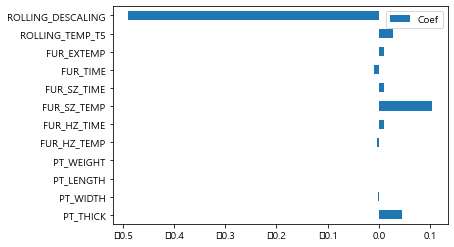

In [ ]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

#### 표준화 회귀 계수

In [ ]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char],axis = 1)
df_scaled.head()

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,ROLLING_TEMP_T5,ROLLING_DESCALING,PLATE_NO,ROLLING_DATE,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,-0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,...,0.000734,-0.19693,PB562774,2021-08-01:08:00:01,AB/EH32-TM,T1,1호기,1열,적용,2조
1,-0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,...,0.028567,-0.19693,PB562775,2021-08-01:08:07:11,AB/EH32-TM,T1,1호기,2열,적용,2조
2,-0.687308,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,...,-0.416748,-0.19693,PB562776,2021-08-01:08:14:21,NV-E36-TM,T8,2호기,1열,적용,3조
3,-0.687308,0.209106,1.568896,-1.095771,-0.944112,-0.160124,1.015800,-1.290843,-0.281206,0.340311,...,-0.453858,-0.19693,PB562777,2021-08-01:08:21:31,NV-E36-TM,T8,2호기,2열,적용,3조
4,-0.687308,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.264257,-1.233894,-1.048422,0.296219,...,-0.565186,-0.19693,PB562778,2021-08-01:08:28:41,BV-EH36-TM,T8,3호기,1열,적용,1조


In [ ]:
# BAD 데이터를 0과 1로 변환, np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled["SCALE"] = np.where(df_scaled["SCALE"]> 0, 1, 0)
df_scaled.head()

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,ROLLING_TEMP_T5,ROLLING_DESCALING,PLATE_NO,ROLLING_DATE,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,...,0.000734,-0.19693,PB562774,2021-08-01:08:00:01,AB/EH32-TM,T1,1호기,1열,적용,2조
1,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,...,0.028567,-0.19693,PB562775,2021-08-01:08:07:11,AB/EH32-TM,T1,1호기,2열,적용,2조
2,0,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,...,-0.416748,-0.19693,PB562776,2021-08-01:08:14:21,NV-E36-TM,T8,2호기,1열,적용,3조
3,0,0.209106,1.568896,-1.095771,-0.944112,-0.160124,1.015800,-1.290843,-0.281206,0.340311,...,-0.453858,-0.19693,PB562777,2021-08-01:08:21:31,NV-E36-TM,T8,2호기,2열,적용,3조
4,0,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.264257,-1.233894,-1.048422,0.296219,...,-0.565186,-0.19693,PB562778,2021-08-01:08:28:41,BV-EH36-TM,T8,3호기,1열,적용,1조


In [ ]:
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""SCALE ~ PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 +  ROLLING_DESCALING""", df_scaled_train)
# 적합
scaled_log_result = scaled_log_model.fit()
# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.342804
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  432
Model:                          Logit   Df Residuals:                      419
Method:                           MLE   Df Model:                           12
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                  0.4512
Time:                        22:28:27   Log-Likelihood:                -148.09
converged:                       True   LL-Null:                       -269.86
Covariance Type:            nonrobust   LLR p-value:                 3.028e-45
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5636      0.190     -8.213      0.000      -1.937      -1.190
PT_THICK

<AxesSubplot:>

C:\kangay\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


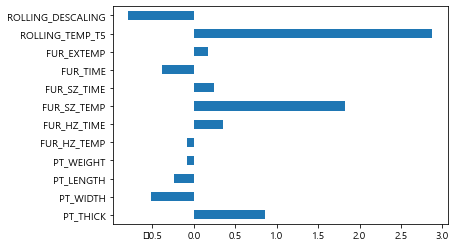

In [ ]:
# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", legend = False)